# Tweet Analysis Notebook - WIP

### Things to look at:

* Key words: which words could contribute to more retweets/favorites/replies?

* Hashtags: Does adding hashtags contribute to more retweets/favorites/replies?

* Tags: Could tagging specific people contribute to more retweets/favorites/replies?

### Visualizations

* Plot retweets/favorites/replies over time for a few different senators

* 

I want to add columns for hashtags and mentions before I strip special characters out. 

In [71]:
%matplotlib inline

from datetime import datetime
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import src.tweet_func as t
import nltk
from nltk.corpus import stopwords
import scipy as sp
import scipy.stats as stats
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(22, 12)})
#plt.style.use('ggplot')

## Read in the data

In [154]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'], ['Capitve', 'Wild', 'Capitve', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df1 = pd.DataFrame({'Max Speed' : [390., 350., 30., 20.]}, index=index)
df1

Max Speed
Animal Type              
Falcon Capitve      390.0
       Wild         350.0
Parrot Capitve       30.0
       Wild          20.0

In [156]:
df1 = pd.DataFrame({'user': ['bob', 'dan', 'angela', 'bob', 'bob', 'angela', 'bob', 'dan', 'angela'],
                   'day': ['m', 'm', 'm', 't', 't', 'w', 'w', 'w', 'w'],
                   'val': [1.45, 2, 0.54, 0.99, 3.1, 0.15, 2.14, 4.01, 3]})
df1

,user,day,val
0,bob,m,1.45
1,dan,m,2.00
2,angela,m,0.54
3,bob,t,0.99
4,bob,t,3.10
5,angela,w,0.15
6,bob,w,2.14
7,dan,w,4.01
8,angela,w,3.00


In [159]:
a = df1.groupby(['user', 'day']).mean()

In [167]:
a.index

MultiIndex(levels=[['angela', 'bob', 'dan'], ['m', 't', 'w']],
           codes=[[0, 0, 1, 1, 1, 2, 2], [0, 2, 0, 1, 2, 0, 2]],
           names=['user', 'day'])

In [31]:
df = pd.DataFrame({'a': [1,2,3,1,3], 'b': ['http:this i!!!s &amp amp sentence','we like p::izza','hello amp World!','http should I eat tacos?', 'test']})
vals = {'a', 'like'}

def remove_empties(x):
    """input: a list of words
       output: a list of words with null or empty strings removed"""
    res = []
    for val in x:
        if val != '' and val != ' ':
            res.append(val)
    return res

def remove_stopwords(x, stop_words):
    """input: a list of words
       output: a list of words with stop_words removed"""
    valids = []
    words = x.split(' ')
    for word in words:
        if word not in stop_words:
            valids.append(word)
    return ' '.join(valids)

def clean_tags(x):
    """input: a list of either mentions or hashtags
       output: a list with special characters and numbers removed after the # or @"""
    filtered_list = []
    for word in x:
        cleaned_word = word[0]
        for char in word[1:]:
            if char.isalpha():
                cleaned_word += char
        filtered_list.append(cleaned_word)
    return filtered_list

def remove_phrase(x, leading_chars):
    """Removes phrases like mentions or hashtags from a list
    input: x - list
           leading_char - character like @ or #
    output: list without phrases"""
    filtered_list = []
    words = x.split(' ')
    for word in words:
        if word[:len(leading_chars)] != leading_chars:
            filtered_list.append(word)
    return ' '.join(filtered_list)

# def filter_out_nonalpha(x):
#     """Filter out special characters or numbers
#     input: a list of words
#     output: a list of strings only containing letters"""
#     valids = []
#     words = x.split(' ')
#     for word in words:
#         clean_word = ''
#         for character in word:
#             if character.isalpha():
#                 clean_word += character
#         valids.append(clean_word)
#     return ' '.join(valids)

stop_words = set(stopwords.words('english'))
df['b'] = df['b'].str.lower()
#df['c'] = df['b'].str.split(' ')
# df['d'] = df['b'].str.findall(r'@.*?(?=\s|$)')
# df['d'] = df['d'].apply(lambda x: clean_tags(x))
df['c'] = df['b'].apply(lambda x: remove_phrase(x, 'http'))
df['c'] = df['c'].apply(lambda x: filter_out_nonalpha(x))
df['d'] = df['c'].apply(lambda x: remove_stopwords(x, stop_words))
# df['b'] = df['b'].apply(lambda x: list(remove_phrase(x, '@')))
df

,a,b,c,d
0,1,http:this i!!!s &amp amp sentence,is sentence,sentence
1,2,we like p::izza,we like pizza,like pizza
2,3,hello amp world!,hello world,hello world
3,1,http should i eat tacos?,should i eat tacos,eat tacos
4,3,test,test,test


In [39]:
def remove_empties(x):
    """input: a list of words
       output: a list of words with null or empty strings removed"""
    res = []
    for val in x:
        if val != '' and val != ' ':
            res.append(val)
    return res

def remove_stopwords(x, stop_words):
    """input: a list of words
       output: a list of words with stop_words removed"""
    valids = []
    words = x.split(' ')
    for word in words:
        if word not in stop_words:
            valids.append(word)
    return ' '.join(valids)

def clean_tags(x):
    """input: a list of either mentions or hashtags
       output: a list with special characters and numbers removed after the # or @"""
    filtered_list = []
    for word in x:
        cleaned_word = word[0]
        for char in word[1:]:
            if char.isalpha():
                cleaned_word += char
        filtered_list.append(cleaned_word)
    return filtered_list

def remove_phrase(x, leading_chars):
    """Removes phrases like mentions or hashtags from a list
    input: x - list
           leading_char - character like @ or #
    output: list without phrases"""
    filtered_list = []
    words = x.split(' ')
    for word in words:
        if word[:len(leading_chars)] != leading_chars:
            filtered_list.append(word)
    return ' '.join(filtered_list)

def filter_out_nonalpha(x):
    """Filter out special characters or numbers
    input: a list of words
    output: a list of strings only containing letters"""
    valids = []
    words = x.split(' ')
    for word in words:
        clean_word = ''
        for character in word:
            if character.isalpha() and character != 'ä' and character != 'ó' and character != 'ñ':
                clean_word += character
        if clean_word != 'amp':
            valids.append(clean_word)
    return ' '.join(valids)


def match_pattern(input_list, pattern):
    import fnmatch
    return fnmatch.filter(input_list, pattern)

def process_tweets(df, *args):
    """process tweet data by applying filters specified in args.
    choices are:
        get_mentions     = create column with @twitter_user mentions
        get_hashtags     = create column with #hashtag(s)
        split_tweets     = create column with a list of words from tweet
        lowercase        = force all letters to lowercase in split_tweets list
        remove_nonalpha  = removes special characters and numbers from list
        remove_stopwords = removes common words referencing stop_words list
        
        return: processed dataframe"""
    
    if 'lowercase' in args:
        df['cleaned_tweets'] = df['tweets'].str.lower()
    if 'get_mentions' in args:
        df['mentions'] = df['cleaned_tweets'].str.findall(r'@.*?(?=\s|$)')
        df['mentions'] = df['mentions'].apply(lambda x: clean_tags(x))
    if 'get_hashtags' in args:
        df['hashtags'] = df['cleaned_tweets'].str.findall(r'#.*?(?=\s|$)')
        df['hashtags'] = df['hashtags'].apply(lambda x: clean_tags(x))
    if 'remove_mentions' in args:
        df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: remove_phrase(x, '@'))
    if 'remove_hashtags' in args:
        df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: remove_phrase(x, '#'))
    if 'remove_http' in args:
        df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: remove_phrase(x, 'http'))
    if 'remove_nonalpha' in args:
        df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: filter_out_nonalpha(x))
    if 'remove_stopwords' in args:
        df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: remove_stopwords(x, stop_words))
    if 'split_tweets' in args:
        df['split_tweets'] = df['cleaned_tweets'].str.split(' ')
        df['split_tweets'] = df['split_tweets'].apply(lambda x: list(remove_empties(x)))
    # change date/times to datetime
    df['created_at'] = df['created_at'].apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))
    return df

In [40]:
df = pd.read_csv('data/senators.csv', encoding = "ISO-8859-1")
stop_words = set(stopwords.words('english'))
df.rename(columns={"text": "tweets"}, inplace=True)
# separate tweets into retweet dataframe and non-retweet dataframe
retweets_df = df.copy()[df['tweets'].str.contains('RT @')]
tweets_df = df[~df["tweets"].str.contains('RT @')]
tweets_df = process_tweets(tweets_df, 
                           'lowercase',
                           'get_mentions',
                           'get_hashtags', 
                           'remove_mentions', 
                           'remove_hashtags',
                           'remove_http',
                           'remove_nonalpha', 
                           'remove_stopwords',
                           'split_tweets' 
                          )
retweets_df = process_tweets(retweets_df, 
                           'lowercase',
                           'get_mentions',
                           'get_hashtags', 
                           'remove_mentions', 
                           'remove_hashtags',
                           'remove_http',
                           'remove_nonalpha', 
                           'remove_stopwords',
                           'split_tweets' 
                          )

In [41]:
senator_df = pd.DataFrame({'user': ['amyklobuchar', 'BillCassidy', 'ChrisCoons', 'ChrisVanHollen',
       'ChuckGrassley', 'InhofePress', 'JeffFlake', 'JerryMoran',
       'JohnBoozman', 'JohnCornyn', 'LindseyGrahamSC', 'lisamurkowski',
       'MarkWarner', 'MartinHeinrich', 'maziehirono', 'McCaskillOffice',
       'McConnellPress', 'MikeCrapo', 'PattyMurray', 'RandPaul',
       'RonWyden', 'RoyBlunt', 'Sen_JoeManchin', 'SenAlexander',
       'SenAngusKing', 'SenatorBaldwin', 'SenatorBurr', 'SenatorCantwell',
       'SenatorCardin', 'SenatorCarper', 'SenatorCollins',
       'SenatorDurbin', 'SenatorEnzi', 'SenatorFischer', 'SenatorHassan',
       'SenatorHeitkamp', 'SenatorIsakson', 'SenatorLankford',
       'SenatorLeahy', 'SenatorMenendez', 'SenatorRisch', 'SenatorRounds',
       'SenatorShaheen', 'SenatorStrange', 'SenatorTester',
       'SenatorTimScott', 'SenatorTomUdall', 'SenatorWicker',
       'SenBennetCO', 'SenBillNelson', 'SenBlumenthal', 'SenBobCasey',
       'SenBobCorker', 'SenBooker', 'SenBrianSchatz', 'SenCapito',
       'SenCortezMasto', 'SenCoryGardner', 'SenDanSullivan',
       'sendavidperdue', 'SenDeanHeller', 'SenDonnelly', 'SenDuckworth',
       'SenFeinstein', 'SenFranken', 'SenGaryPeters', 'SenGillibrand',
       'SenJackReed', 'SenJeffMerkley', 'SenJohnBarrasso',
       'SenJohnHoeven', 'SenJohnKennedy', 'SenJohnMcCain', 'SenJohnThune',
       'SenJoniErnst', 'SenKamalaHarris', 'SenMarkey', 'SenMikeLee',
       'SenMurphyOffice', 'senorrinhatch', 'SenPatRoberts',
       'senrobportman', 'SenRonJohnson', 'SenRubioPress', 'SenSanders',
       'SenSasse', 'SenSchumer', 'SenShelby', 'SenSherrodBrown',
       'SenStabenow', 'SenTedCruz', 'SenThadCochran', 'SenThomTillis',
       'SenToddYoung', 'SenTomCotton', 'SenToomey', 'SenWarren',
       'SenWhitehouse', 'SteveDaines', 'timkaine'],
                          'age' : [57, 60, 54, 59, 84, 83, 55, 63, 67, 66, 62, 60, 63, 46, 70, 64, 76, 66, 67, 55, 68, 68, 70, 77, 
                                   74, 56, 62, 59, 74, 71, 65, 73, 74, 67, 62, 62, 73, 50, 78, 64, 74, 63, 71, 65, 61, 52, 69, 66, 
                                   53, 75, 72, 57, 65, 48, 45, 64, 54, 43, 53, 68, 57, 62, 50, 82, 66, 59, 51, 69, 61, 65, 61, 66, 
                                   80, 57, 47, 53, 71, 46, 44, 84, 81, 62, 63, 46, 76, 46, 67, 83, 65, 67, 47, 79, 57, 45, 40, 56, 
                                   68, 62, 55, 60
                                  ]})

In [42]:
tweets_df = pd.merge(tweets_df, senator_df, on='user')

In [43]:
tweets_df['sentiment'] = tweets_df['cleaned_tweets'].apply(lambda tweet: TextBlob(tweet).sentiment)
tweets_df['polarity'] = tweets_df['sentiment'].apply(lambda x: x.polarity)

In [44]:
D_tweets_df = tweets_df[tweets_df['party'] == 'D']
R_tweets_df = tweets_df[tweets_df['party'] == 'R']
I_tweets_df = tweets_df[tweets_df['party'] == 'I']

In [45]:
D_users = D_tweets_df.groupby('user')
d_mean = D_users.mean()
R_users = R_tweets_df.groupby('user')
r_mean = R_users.mean()

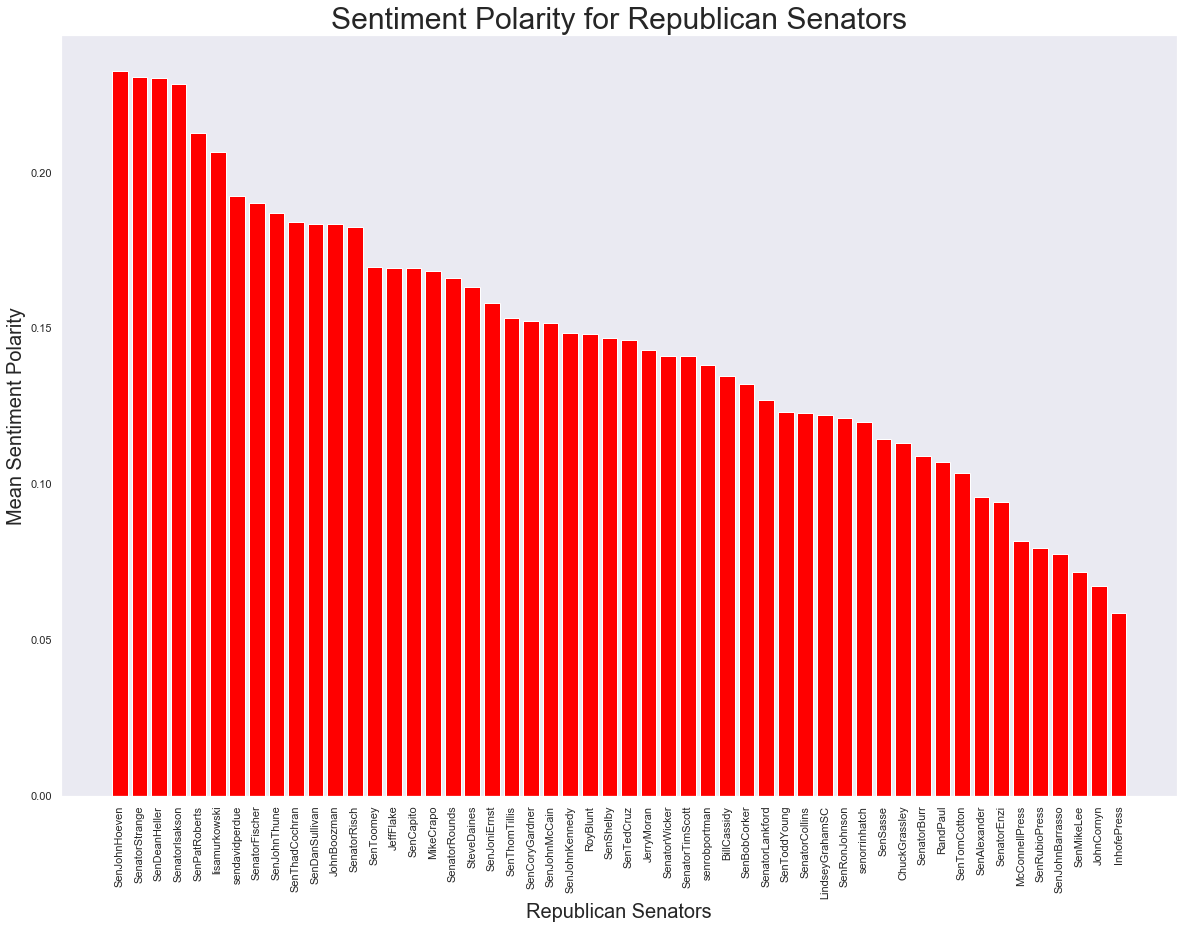

In [46]:
r_sorted = r_mean['polarity'].sort_values(ascending=False)
# x will be the left hand edge of the bars.
x = np.arange(len(r_sorted))

fig, ax = plt.subplots(figsize=(20,14))

bars = ax.bar(x, r_sorted, color='red')
# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x)
ax.set_xticklabels(r_sorted.index, rotation=90)
ax.set_xlabel('Republican Senators', fontsize =20)
ax.set_ylabel('Mean Sentiment Polarity', fontsize=20)
ax.set_title('Sentiment Polarity for Republican Senators', fontsize=30)
ax.grid(False)
plt.show()

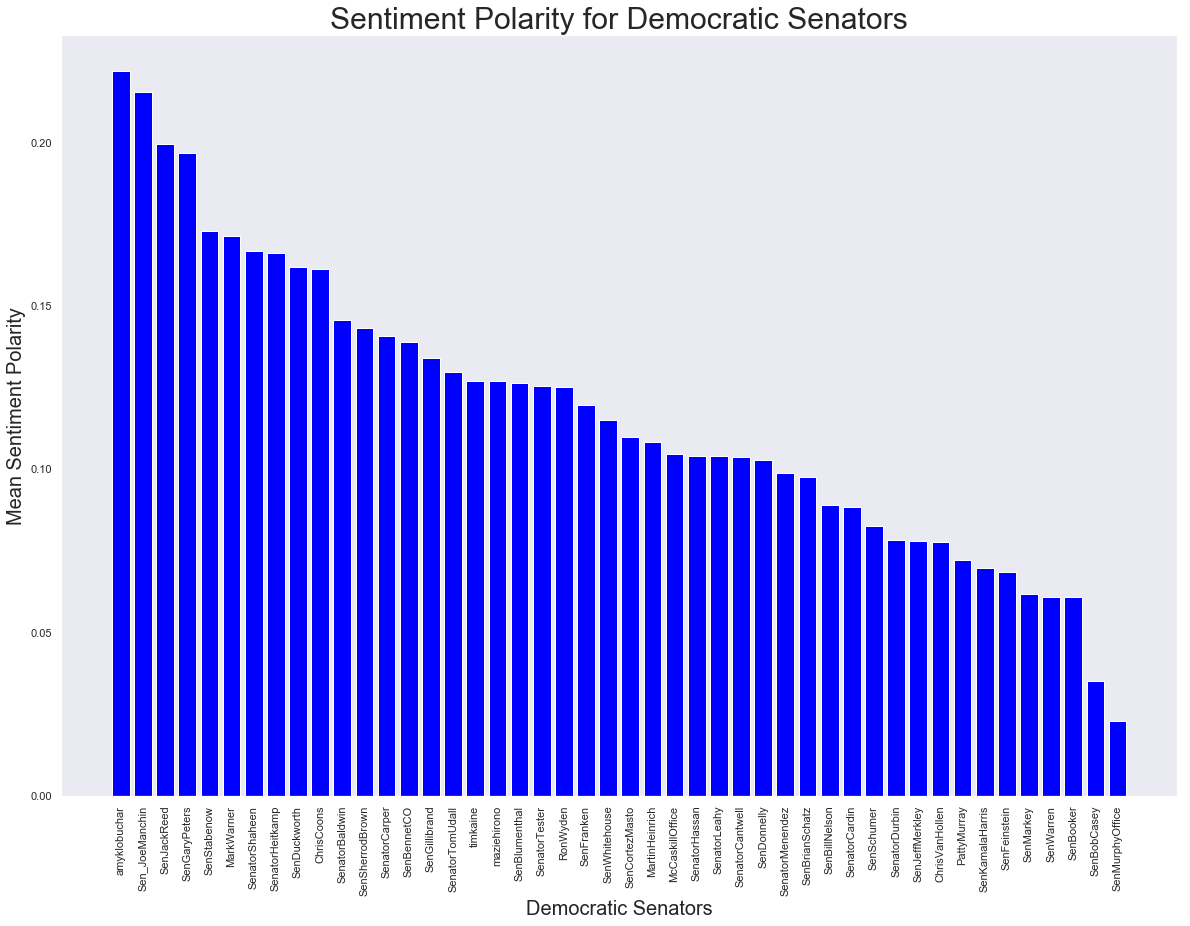

In [47]:
d_sorted = d_mean['polarity'].sort_values(ascending=False)
# x will be the left hand edge of the bars.
x = np.arange(len(d_sorted))

fig, ax = plt.subplots(figsize=(20,14))

bars = ax.bar(x, d_sorted, color='blue')
# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x)
ax.set_xticklabels(d_sorted.index, rotation=90)
ax.set_xlabel('Democratic Senators', fontsize =20)
ax.set_ylabel('Mean Sentiment Polarity', fontsize=20)
ax.set_title('Sentiment Polarity for Democratic Senators', fontsize=30)
ax.grid(False)
plt.show()

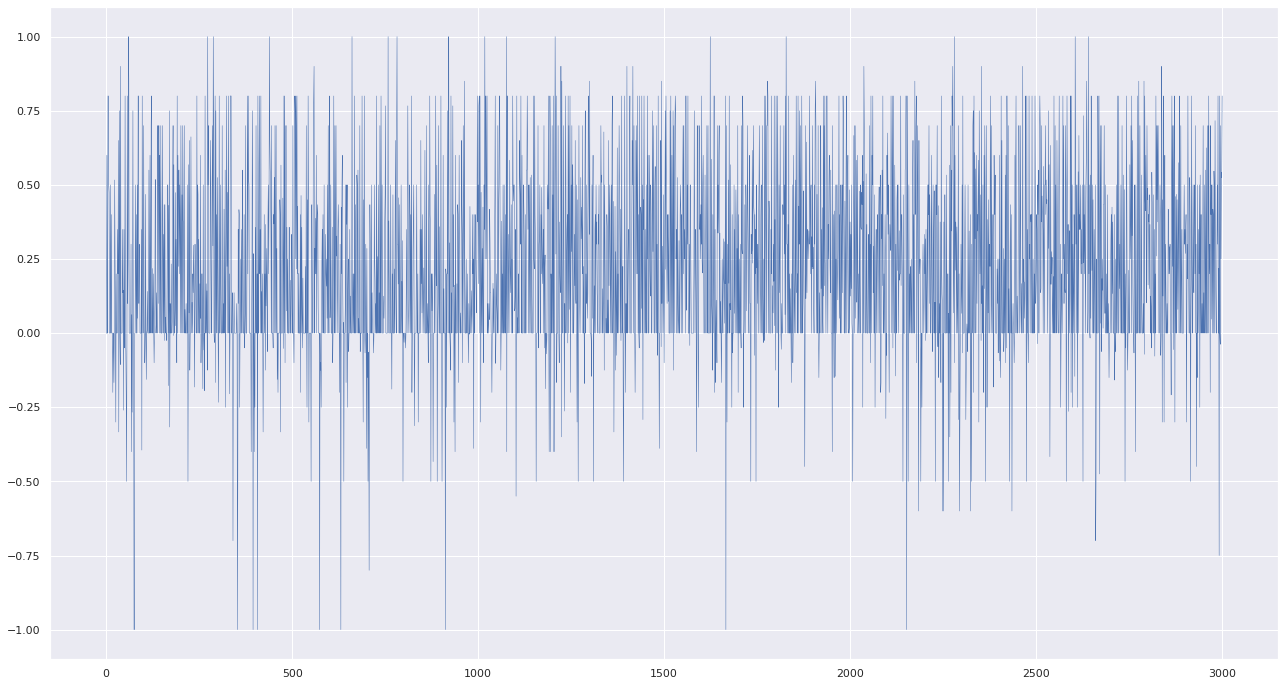

In [34]:
D_tweets_df[D_tweets_df['user'] == 'amyklobuchar']['polarity'].plot(linewidth=0.5);

In [149]:
import matplotlib.dates as mdates
D_tweets_df = D_tweets_df.set_index('created_at')

In [153]:
D_tweets_df.groupby([D_tweets_df.index.month]).mean()

,replies,retweets,favorites,age,polarity
created_at,,,,,
1,40.959590,249.347432,577.067154,63.425542,0.105208
2,42.593893,229.964761,633.790863,63.478306,0.118814
3,30.487221,162.224357,392.417496,62.938679,0.117865
4,18.380822,90.680333,228.246967,62.700391,0.138708
5,22.788584,144.264334,321.844814,62.788669,0.116514
6,31.435989,211.403171,475.851447,62.802061,0.093333
7,30.016581,189.939573,495.110769,62.969060,0.109092
8,35.531427,200.162731,548.556368,62.725529,0.147847
9,29.688621,193.163973,444.507841,63.081705,0.123640


In [46]:
amy_df = D_tweets_df[D_tweets_df['user'] == 'amyklobuchar']

In [57]:
len(amy_df.loc['2017-01':'2017-04'])

0

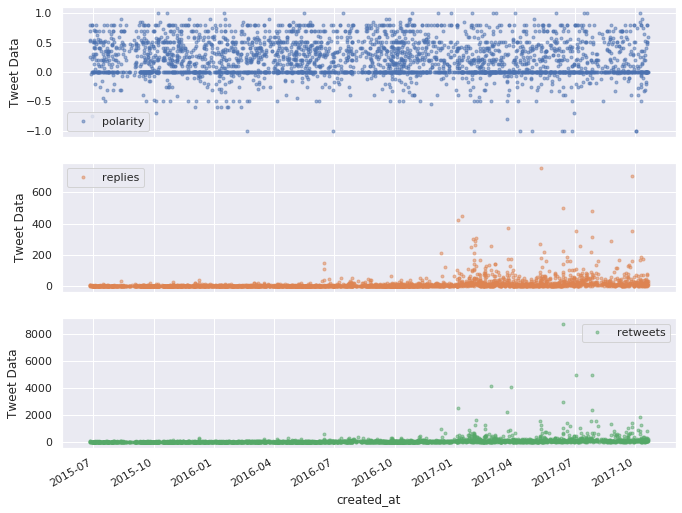

In [58]:
cols_plot = ['polarity', 'replies', 'retweets']
axes = amy_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Tweet Data')

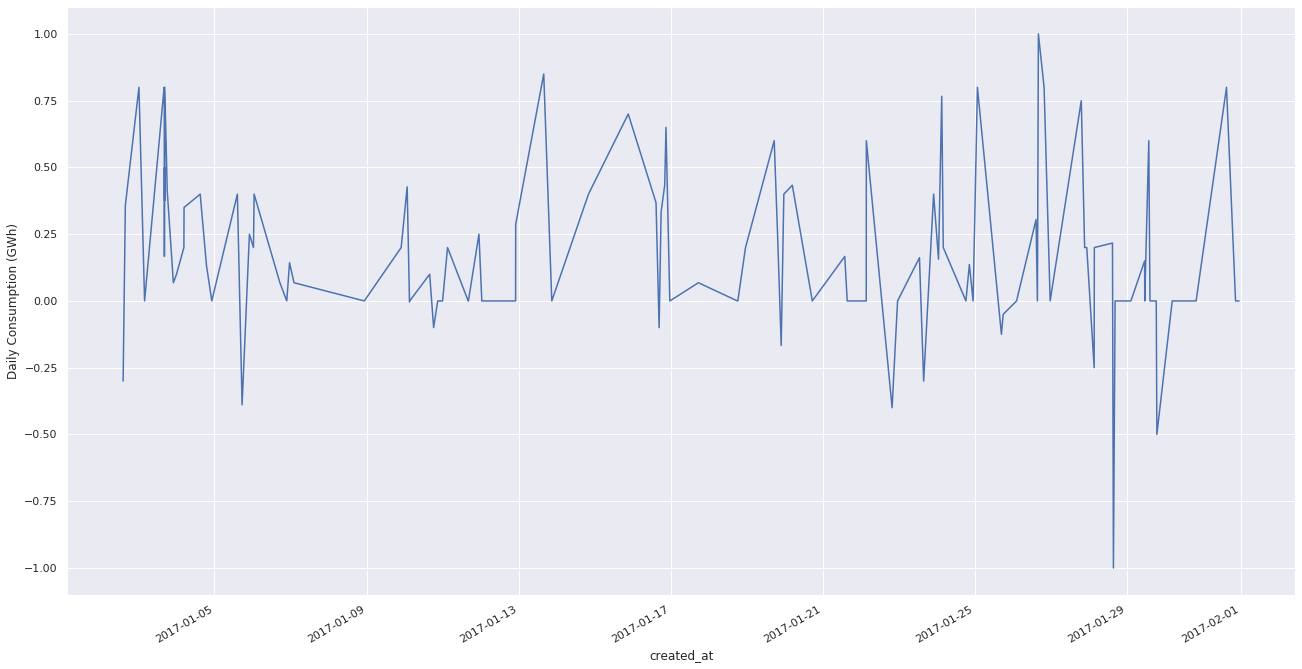

In [60]:
ax = amy_df.loc['2017-01', 'polarity'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

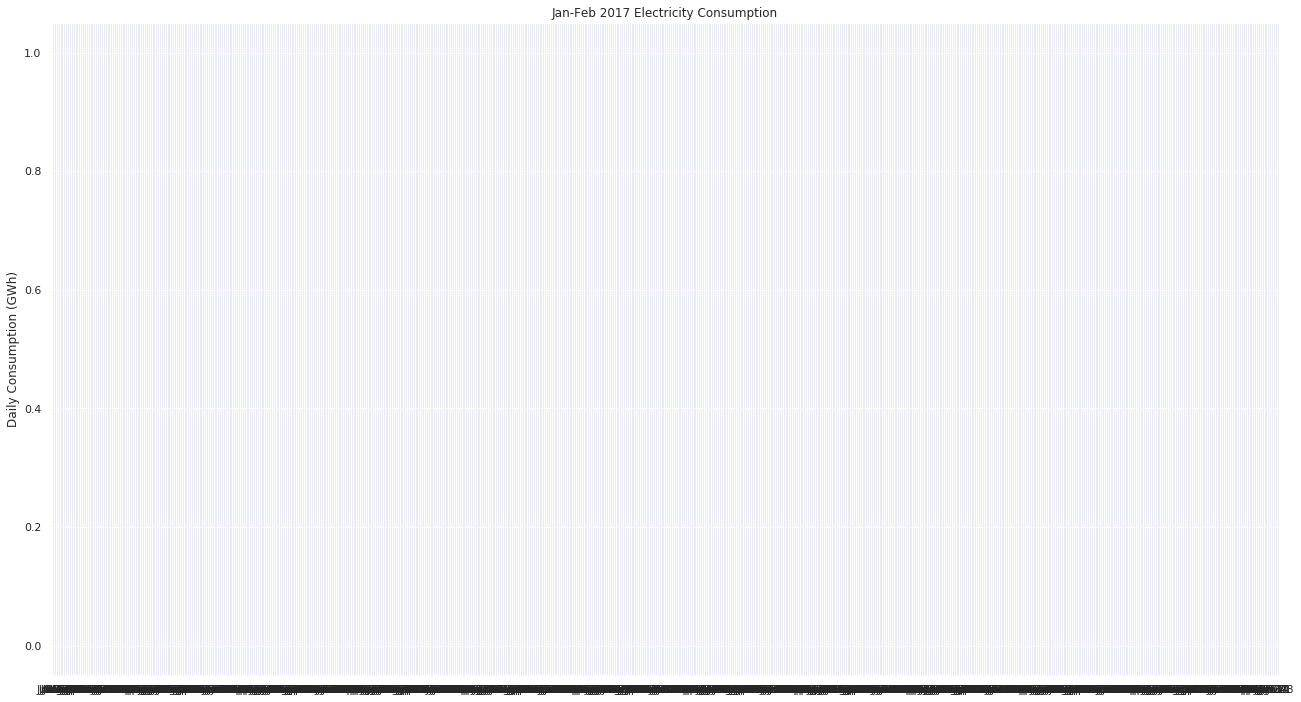

In [47]:
fig, ax = plt.subplots()
ax.plot(amy_df.loc['2018-01':'2018-12', 'polarity'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [35]:
avg_by_day = D_tweets_df[D_tweets_df['user'] == 'amyklobuchar']['polarity'].groupby(pd.Grouper(freq='D')).mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [76]:
# Null hypothesis: Republicans and Democrats have the same average sentiment
# Alternative hypothesis: Democrats will have a more positive average sentiment than Republicans

In [77]:
# Null hypothesis: Republicans will have avg sentiment = 0
# Alternative hypothesis: Republicans will have avg sentiment < 0

In [78]:
# Null hypothesis: Democrats will have avg sentiment = 0
# Alternative hypothesis: Democrats will have avg sentiment > 0

In [68]:
print('dem std: {}'.format(D_tweets_df['polarity'].std()))
print('dem std: {}'.format(R_tweets_df['polarity'].std()))
print('dem std: {}'.format(I_tweets_df['polarity'].std()))

dem std: 0.29971680256737154
dem std: 0.2989966883144899
dem std: 0.2879898787427231


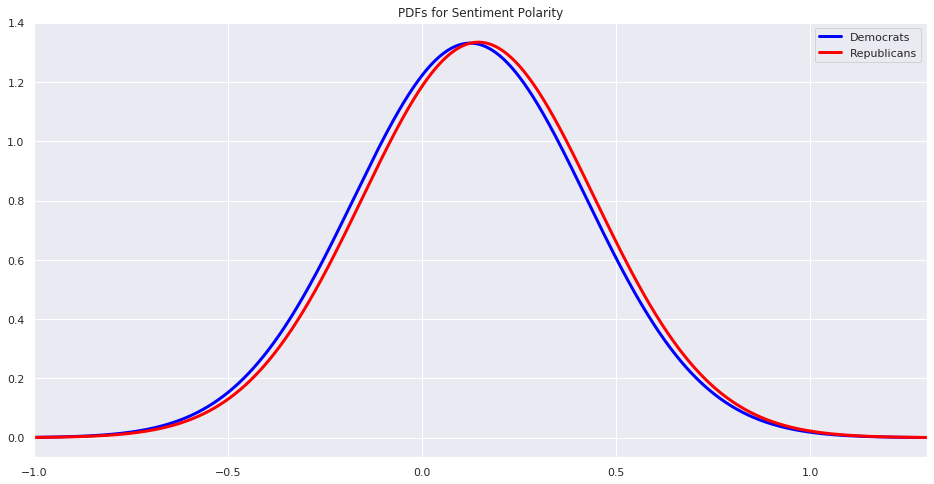

In [101]:
x = np.linspace(-1, 1.3, num=3000)
D_binomial_mean = D_tweets_df['polarity'].mean()
D_binomial_var = D_tweets_df['polarity'].var()
D_normal_approx = stats.norm(D_binomial_mean, np.sqrt(D_binomial_var))

R_binomial_mean = R_tweets_df['polarity'].mean()
R_binomial_var = R_tweets_df['polarity'].var()
R_normal_approx = stats.norm(R_binomial_mean, np.sqrt(R_binomial_var))

fig, ax = plt.subplots(1, figsize=(16, 8))

ax.plot(x, D_normal_approx.pdf(x), linewidth=3, color='blue', label='Democrats')
ax.plot(x, R_normal_approx.pdf(x), linewidth=3, color='red', label='Republicans')
ax.set_xlim(-1,1.3)
# ax.fill_between(x, normal_approx.pdf(x), 
#                 where=(x >= 0.75), color="red", alpha=0.5)
ax.set_title("PDFs for Sentiment Polarity")
ax.legend()
plt.show()

In [ ]:
x = np.linspace(0, 3100, num=3000)

In [57]:
type(D_tweets_df['polarity'])

pandas.core.series.Series

In [55]:
R_tweets_df['polarity'].mean()

0.14486279822055884

In [56]:
I_tweets_df['polarity'].mean()

0.10189553022125278

In [ ]:
tweets_df[tweets_df['party'] == 'D'].mean()

In [ ]:
tweets_df[tweets_df['party'] == 'R'].mean()

In [ ]:
for i in tweets_df['split_tweets'][:19]:
    print(i)

In [103]:
def get_tags(df, column):
    """gets all unique tags (hashtags or mentions) from a dataframe"""
    tag_list = []
    for tags in df[column]:
        if len(tags) != 0:
            for tag in tags:
                if tag not in tag_list:
                    tag_list.append(tag)
    return tag_list


def count_dictionary(lst):
    count_d = dict()
    for word in lst:
        if word not in count_d.keys():
            count_d[word] = 1
        else:
            count_d[word] += 1
    return count_d

def get_counts(x):
    count = 0
    if len(x) == 0:
        return 0
    for i in x:
        for j in i:
            count += 1
    return count

def get_unique_counts(x):
    unique_vals = []
    if len(x) == 0:
        return 0
    for i in x:
        for j in i:
            if j not in unique_vals:
                unique_vals.append(j)
    return len(unique_vals)

In [ ]:
tweet_hashtags = get_tags(tweets_df, 'hashtags')
tweet_mentions = get_tags(tweets_df, 'mentions')

In [ ]:
match_pattern(tweet_hashtags, '*egg*')

In [ ]:
bernie_df = tweets_df[tweets_df['user'] == 'SenSanders']
bernie_df.index = pd.to_datetime(bernie_df['created_at'],format='%m/%d/%y %I:%M%p')
bernie_hashtags = get_tags(bernie_df, 'hashtags')
bernie_mentions = get_tags(bernie_df, 'mentions')
print(len(bernie_hashtags))
print(len(bernie_mentions))

In [ ]:
tweets_df[tweets_df['hashtags'].apply(lambda x: '#gunviolence' in x)].groupby('user').mean()

In [ ]:
bernie_df[bernie_df['hashtags'].apply(lambda x: '#charlottesville' in x)]

In [ ]:
cols_plot = ['replies', 'retweets', 'favorites']
axes = bernie_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(18, 12), subplots=True)
for ax in axes:
    ax.set_ylabel('Tweet Engagement')

In [ ]:
tweets_df.index = pd.to_datetime(tweets_df['created_at'],format='%m/%d/%y %I:%M%p')
gv_favs = tweets_df[tweets_df['hashtags'].apply(lambda x: '#charlottesville' in x)]['retweets']
plt.hist(gv_favs, bins=800)
plt.show()

In [ ]:
# group by senator, get counts of number of hashtags used in tweets

# look at hashtag use by age?

In [ ]:
users = tweets_df.groupby('user')
hashs = users.apply(lambda x: get_counts(x['hashtags']))
unique_hashs = users.apply(lambda x: get_unique_counts(x['hashtags']))

In [ ]:
D_users = D_tweets_df.groupby('user')
D_hashs = D_users.apply(lambda x: get_counts(x['hashtags']))
D_unique_hashs = D_users.apply(lambda x: get_unique_counts(x['hashtags']))
R_users = R_tweets_df.groupby('user')
R_hashs = R_users.apply(lambda x: get_counts(x['hashtags']))
R_unique_hashs = R_users.apply(lambda x: get_unique_counts(x['hashtags']))
I_users = I_tweets_df.groupby('user')
I_hashs = I_users.apply(lambda x: get_counts(x['hashtags']))
I_unique_hashs = I_users.apply(lambda x: get_unique_counts(x['hashtags']))

Get list of all words for each party

In [125]:
D_all_words = [D_tweets_df['split_tweets'] for y in x]
D_words = []
for i in D_all_words[1]:
    for j in i:
        D_words.append(j)
        
R_all_words = [R_tweets_df['split_tweets'] for y in x]
R_words = []
for i in R_all_words[1]:
    for j in i:
        R_words.append(j)

In [126]:
D_all_words[0][0]

['released',
 'bipartisan',
 'healthcare',
 'bill',
 'today',
 'ill',
 'keep',
 'working',
 'get',
 'done']

In [130]:
R_all_words = [R_tweets_df['split_tweets'] for y in x]

In [136]:
R_words = []
for i in R_all_words[1]:
    for j in i:
        R_words.append(j)

In [138]:
d_dict = count_dictionary(D_words)
r_dict = count_dictionary(R_words)

In [139]:
d_max_key = max(d_dict, key=d_dict.get)
r_max_key = max(r_dict, key=r_dict.get)

In [140]:
print(d_max_key, d_dict[d_max_key])

today 8392


In [141]:
r_max_key

'today'

In [142]:
print(r_max_key, r_dict[r_max_key])

today 11228


In [148]:
for k,v in d_dict.items():
    if v > 4500:
        print('{}, {}'.format(k,v))

bill, 6534
today, 8392
great, 5821
w, 6063
work, 4671
need, 4733
help, 4724
must, 5012
new, 4590
us, 5682
care, 5783
health, 6718
senate, 4934


In [147]:
for k,v in r_dict.items():
    if v > 3000:
        print('{}, {}'.format(k,v))

good, 3053
w, 6972
live, 3319
day, 3074
act, 3236
today, 11228
work, 3469
watch, 3886
help, 4540
bill, 5656
support, 3143
senate, 6427
new, 3741
us, 5931
great, 7607
thanks, 3767
hearing, 3260


## Who tweets more?

In [190]:
gbm['month_year'] = pd.to_datetime(gbm.index).dt.to_period('M')

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

In [183]:
gbm = D_tweets_df.groupby([pd.Grouper(freq="M")]).count()['tweets']

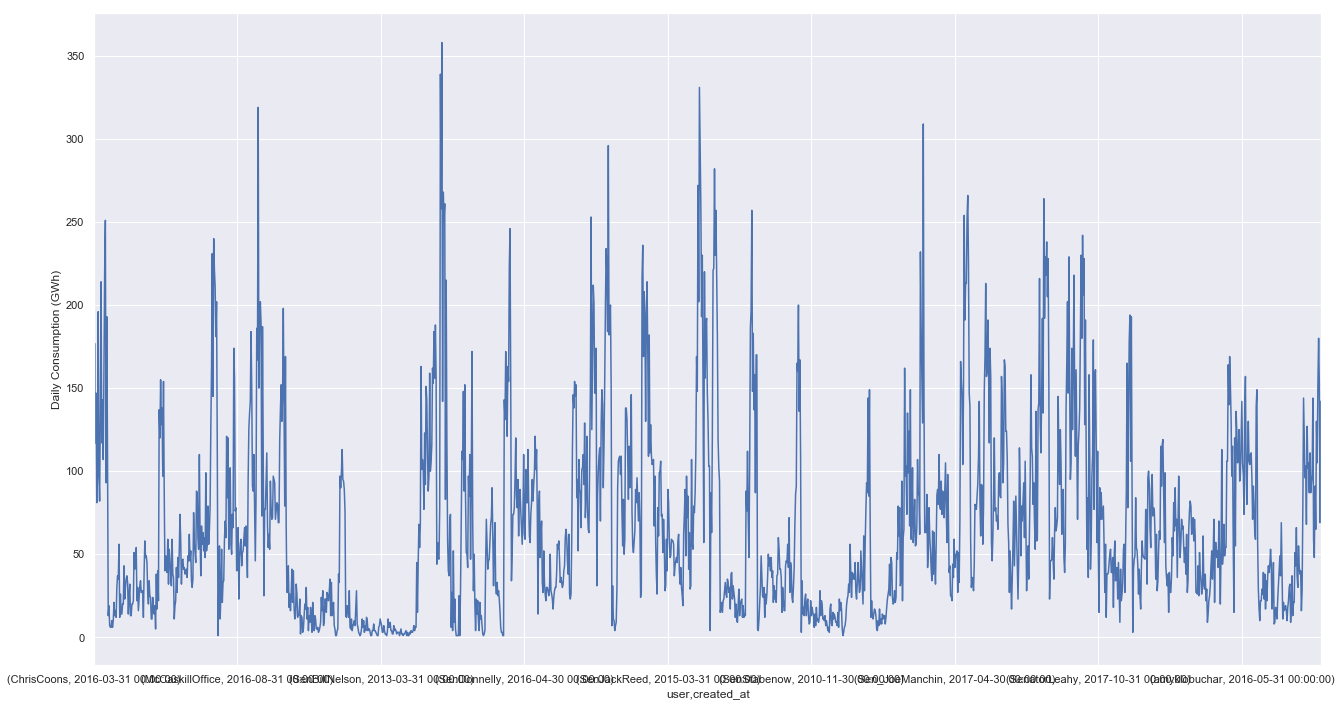

In [177]:
ax = gbm.plot()
ax.set_ylabel('Daily Consumption (GWh)');

## Wordcloud

In [54]:
all_words = [tweets_df['cleaned_tweets'] for y in x]

In [60]:
words = ' '.join(all_words[0])

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [38]:
match_pattern(tweets, '* amp *')

['released bipartisan healthcare bill today amp ill keep working get done',
 'spoke team abt bill yesterdays sessions hearing amp admins attacks st amendment',
 'todays day amp intro bill protect democracy amp bring transparency',
 'markwarner amp put together bill make public bought online political adîthe rule tv ads',
 'great chat w sessions hearing amp concerns w ags answers russia amp press freedom dont want',
 'fed judges md amp hi halted admins latest travel banîits rd travel ban blocked federal courts',
 'good hear ag sessions willing work w amp strengthen disclosure requirements online ads',
 'hearing sessions says work amp others protect natl security putting rules roa',
 'sessions hearing asked election integrity com amp request private data amp whether staff com charge',
 'breaking amp reached agreement healthcarethis focus debate  important changes mn',
 'potus says drug cos getting away w murder support amp bill stop drug cos payments keep drugs market',
 'always great ta

In [15]:
D_tweets_df['cleaned_tweets'].head()

0    released bipartisan healthcare bill today amp ...
1    spoke team abt bill yesterdays sessions hearin...
2    lots interest bill senators warner mccain call...
3    todays day amp intro bill protect democracy am...
4    markwarner amp put together bill make public b...
Name: cleaned_tweets, dtype: object

In [63]:
tweets = [i for i in D_tweets_df['cleaned_tweets']]
D_words = ''.join(tweets)

In [64]:
tweets = [i for i in R_tweets_df['cleaned_tweets']]
R_words = ''.join(tweets)

In [ ]:
# R_all_words = [y for x in R_tweets_df['split_tweets'] for y in x]
# R_word_list = list(filter(lambda x: x != 'amp', R_all_words))
# R_words = ' '.join(R_word_list)

In [68]:
df['tweets'][0]

'We released bipartisan healthcare bill today &amp; Iäó»ll keep working to get this done. https://t.co/WMr8pnA4PP'

In [66]:
D_words[:100]

'released bipartisan healthcare bill today ill keep working get donespoke team abt bill yesterdays se'

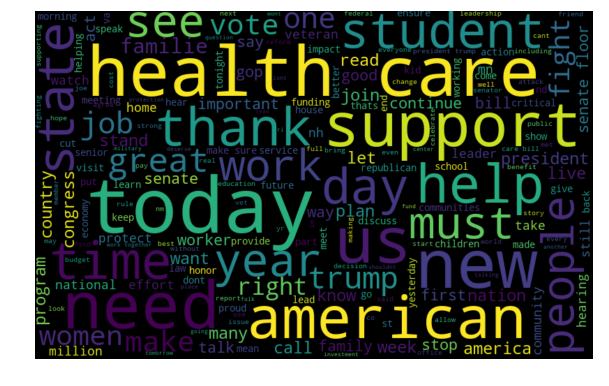

In [69]:
D_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(D_words)
plt.figure(figsize=(10, 7))
plt.imshow(D_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

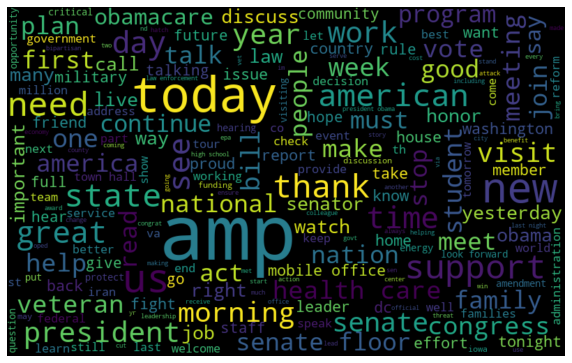

In [42]:
R_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(R_words)
plt.figure(figsize=(10, 7))
plt.imshow(R_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [73]:
republican_mask = np.array(Image.open("images/republican_mask.png"))
democrat_mask = np.array(Image.open("images/democrat_mask.png"))

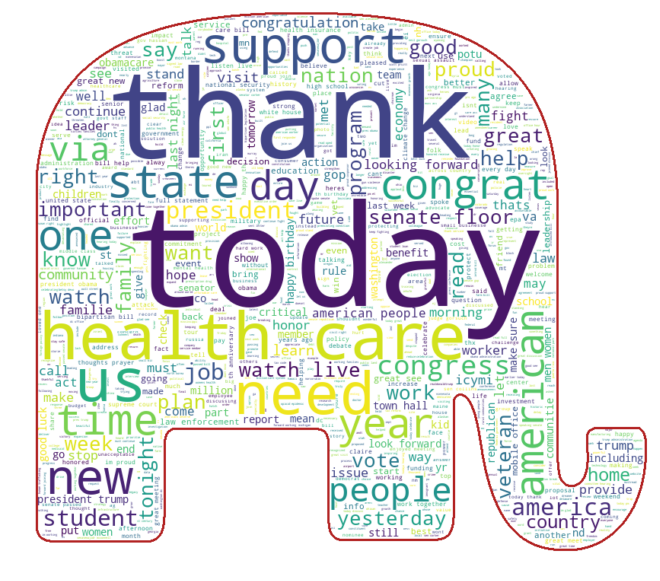

In [74]:
wc = WordCloud(background_color="white", max_words=1000, mask=republican_mask,
               contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(words)

# store to file
wc.to_file("images/republican_words.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

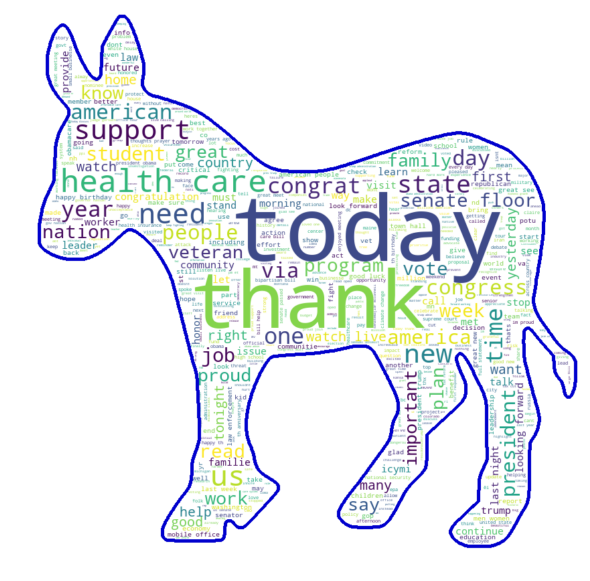

In [105]:
wc = WordCloud(background_color="white", max_words=1000, mask=democrat_mask,
               contour_width=6, contour_color='mediumblue')

# Generate a wordcloud
wc.generate(words)

# store to file
wc.to_file("images/democratic_words.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
d_train = D_words[:6786669]
d_test = D_words[6786670:]
cv = CountVectorizer(binary=True)
cv.fit(d_train)
X = cv.transform(d_train)
X_test = cv.transform(d_test)

In [ ]:
from textblob import TextBlob

In [ ]:
df = pd.DataFrame({'user': ['user1', 'user2', 'user1', 'user3', 'user3'], 'tweet': ['I really love to go eat tacos! Yummy. But I hate pizza!',
                                                                               'If I die, I want to burn in the pits of hell!',
                                                                               'Have you ever had a bad burrito? Eww gross.',
                                                                               'What if we never wake up? What if this is just a dream?',
                                                                               'Must get rid of toxic in community']})
# df['blob'] = df['tweet'].apply(lambda x: TextBlob(x))
df

In [ ]:
df['sentiment'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment)
df['polarity'] = df['sentiment'].apply(lambda x: x.polarity)

In [ ]:
df

In [ ]:
TextBlob('Must get rid of toxic in community')

In [ ]:
d_sorted = D_hashs.sort_values(ascending=False)

# x will be the left hand edge of the bars.
x = np.arange(len(d_sorted))

fig, ax = plt.subplots()

bars = ax.bar(x, d_sorted, color='blue')
# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x)
ax.set_xticklabels(d_sorted.index, rotation=90)
ax.set_xlabel('Democrats', fontsize =20)
ax.set_ylabel('Number of Hashtags Used', fontsize=20)
ax.set_title('Number of Hashtags Used by Democrat', fontsize=30)
ax.grid(False)
plt.show()

In [ ]:
d_hash_age = pd.merge(D_hashs.to_frame(name='hashtags'), senator_df, on='user')
r_hash_age = pd.merge(R_hashs.to_frame(name='hashtags'), senator_df, on='user')
d_mean = d_hash_age.groupby('age').mean()
r_mean = r_hash_age.groupby('age').mean()

In [ ]:
#d_mean_sorted = d_mean.sort_values(by='hashtags', ascending=False)

# x will be the left hand edge of the bars.
x = np.arange(len(d_mean_sorted))

fig, ax = plt.subplots()

bars = ax.bar(x, d_mean['hashtags'], color='blue')
# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x)
ax.set_xticklabels(d_mean.index, rotation=90)
ax.set_xlabel('Age', fontsize =20)
ax.set_ylabel('Mean Number of Hashtags Used', fontsize=20)
ax.set_title('Number of Hashtags Used by Democrats by Age', fontsize=30)
ax.grid(False)
plt.show()

In [ ]:
# x will be the left hand edge of the bars.
x = np.arange(len(r_mean))

fig, ax = plt.subplots()

bars = ax.bar(x, r_mean['hashtags'], color='red')
# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x)
ax.set_xticklabels(r_mean.index, rotation=90)
ax.set_xlabel('Age', fontsize =20)
ax.set_ylabel('Mean Number of Hashtags Used', fontsize=20)
ax.set_title('Number of Hashtags Used by Republican by Age', fontsize=30)
ax.grid(False)
plt.show()

In [ ]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
df2

In [ ]:
pd.DataFrame(R_hashs.to_frame(), columns = ['user', 'hashtags'])

In [ ]:
pd.merge(pd.R_hashs, senator_df, on='user')

In [ ]:
#plt.style.use('dark_background')
# x will be the left hand edge of the bars.
x = np.arange(len(R_hashs))

fig, ax = plt.subplots(figsize=(20,14))

bars = ax.bar(x, R_hashs.sort_values(ascending=False), color='red')
# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x)
ax.set_xticklabels(R_hashs.index, rotation=90)
ax.set_xlabel('Republican Senators', fontsize =20)
ax.set_ylabel('Number of Hashtags Used', fontsize=20)
ax.set_title('Number of Hashtags Used by Republican', fontsize=30)
ax.grid(False)
plt.show()

In [ ]:
def plot_neon_plots(plot_list, n_shades, title, x_label, y_label, fig_size, save_fig=False):
    plt.style.use("dark_background")
    fig, ax = plt.subplots(figsize=fig_size)
    
    for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
        plt.rcParams[param] = '0.9'  # very light grey
    for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
        plt.rcParams[param] = '#212946'  # bluish dark grey
    colors = [
        '#08F7FE',  # teal/cyan
        '#FE53BB',  # pink
        '#F5D300',  # yellow
        '#00ff41',  # matrix green
    ]
    for i, plot in enumerate(plot_list):
        neon_plot(plot, n_shades, colors[i], ax)
        plt.legend(plot.name, fontsize=20)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.title(title, fontsize=35)
    if save_fig:
        plt.savefig('Neon_Plot.png')
    plt.tight_layout()

def neon_plot(col_data, n_shades, color, ax):

    # set up values for neon glow
    diff_linewidth = 1.05
    alpha_value = 0.3 / n_shades
    
    col_data.plot(marker='o', color=color)
        # Redraw the data with low alpha and slighty increased linewidth:
    for n in range(1, n_shades+1):
        col_data.plot(marker='o',
                linewidth=2+(diff_linewidth*n),
                alpha=alpha_value,
                legend=False,
                color=color)
    # Color the areas below the lines:
    ax.fill_between(x=col_data.index,
                    y1=col_data.values,
                    y2=[0] * len(col_data),
                    color=color,
                    alpha=0.1)
    ax.grid(color='#2A3459')
    ax.set_xlim(0, len(col_data)-1)
    ax.set_ylim(0)  

In [ ]:
cols = [R_hashs.sort_values(ascending=False)]
plot_neon_plots(cols, 10, 'This is a Plot', 'x_data', 'y_data', fig_size=(16,10), save_fig=True)

In [ ]:
# x will be the left hand edge of the bars.
x = np.arange(100)

fig, ax = plt.subplots()

bars = ax.bar(x, unique_hashs)
# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x)
ax.set_xticklabels(unique_hashs.index, rotation=45)
plt.savefig('test_plot.jpg')
plt.show()

In [ ]:
df = pd.DataFrame({'user': ['user_1', 'user_2', 'user_1', 'user_3', 'user_1', 'user_3'], 
                   'values': [['v1', 'v2'], ['v3', 'v4', 'v5'], ['v2'], [], ['v1', 'v4'], ['v5']]})
df

In [ ]:
def get_counts(x):
    count = 0
    if len(x) == 0:
        return 0
    for i in x:
        for j in i:
            count += 1
    return count

def get_unique_counts(x):
    unique_vals = []
    if len(x) == 0:
        return 0
    for i in x:
        for j in i:
            if j not in unique_vals:
                unique_vals.append(j)
    return len(unique_vals)

In [ ]:
df.groupby('user').apply(lambda x: get_counts(x['values']))

In [ ]:
df.groupby('user').apply(lambda x: get_unique_counts(x['values']))

In [ ]:
sub_df = df[['user', 'hashtags']]

In [ ]:
for i in range(len(sub_df)):
    print(sub_df.iloc[i])

How many tweets are retweets?

In [ ]:
print(f'shape of tweets dataframe: {tweets_df.shape}')
print(f'shape of retweets dataframe: {retweets_df.shape}')
print(f'percent not retweets: {len(tweets_df)/len(df):2.2f}')
print(f'percent retweets: {len(retweets_df)/len(df):2.2f}')

In [ ]:
t.filter_df(retweets_df, 'favorites', 1000000, max)

In [ ]:
for tweet in t.filter_df(tweets_df, 'favorites', 800000, max)['tweets']:
    print(tweet)


In [ ]:
t.filter_df(tweets_df, 'retweets', 0, max)

In [ ]:
t.filter_df(retweets_df, 'retweets', 0, max)

In [ ]:
t.filter_df(retweets_df, 'replies', 0, max)

In [ ]:
t.filter_df(tweets_df, 'replies', 0, max)

In [ ]:
print('min date: ', tweets_df['created_at'].min())
print('max date: ', tweets_df['created_at'].max())

In [ ]:
avg_by_day = amy_df.groupby(pd.Grouper(freq='D')).mean()
avg_by_day[['replies', 'retweets', 'favorites']]

In [ ]:
avg_by_month = amy_df.groupby(pd.Grouper(freq='M')).mean()
avg_by_month[['replies', 'retweets', 'favorites']]

In [ ]:
bernie_df['replies'].plot(linewidth=0.5);

In [ ]:
cols_plot = ['replies', 'retweets', 'favorites']
axes = bernie_df[cols_plot].plot(marker='.', alpha=1, linestyle='None', figsize=(11, 9), subplots=False)
ax.set_ylabel('Daily Tweets')

In [ ]:
count_d = dict()
for word_list in tweets_df['split_tweets']:
    for word in word_list:
        if word not in stop_words:
            if word not in count_d.keys():
                count_d[word] = 1
            else:
                count_d[word] += 1

In [ ]:
for word_list in tweets_df['split_tweets']:
    for word in word_list:
        if word not in stop_words:
            if word not in count_d.keys():
                count_d[word] = 1
            else:
                count_d[word] += 1

In [ ]:
count_d['shooting']

In [ ]:
for k,v in count_d.items():
    if v > 5000:
        print(k,v)

In [ ]:
test_df = tweets_df.copy()[:10]

In [ ]:
test_df[test_df['mentions'].apply(lambda x: '@morningjoe' in x)]

In [ ]:
filter_tweets(tweets_df, 'tweets', 'guns').mean()

In [ ]:
tweets_df.mean()

In [ ]:
test_df = tweets_df.copy()[:10]
test_df['mentions'] = test_df['tweets'].str.findall(r'@.*?(?=\s|$)')
test_df['hashtags'] = test_df['tweets'].str.findall(r'#.*?(?=\s|$)')

In [ ]:
test_df

In [ ]:
def filter_tweets(df, column, keyword):
    """filter tweets in a dataframe to only those that
    contain the keyword provided"""
    return df[df[column].str.contains(keyword)]

In [ ]:
temp_df = tweets_df.copy()[:10]

In [ ]:
temp_df

In [ ]:
tweets_df[tweets_df['hashtags'].apply(lambda x: '#Charlottesville' in x)]